In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


In [81]:
df = pd.read_csv('nyc bus data.csv')
df = df.drop_duplicates()
# = df.dropna()
df.head()

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76,6/1/2017 0:03,24:06:14,NaN
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62,6/1/2017 0:03,23:58:02,NaN
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5,6/1/2017 0:03,24:00:53,NaN
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267,6/1/2017 0:04,24:03:00,NaN
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11,6/1/2017 0:03,23:59:38,NaN


In [82]:
df.shape

(1048575, 18)

In [83]:
#subset the dataframe to include only the first 100,000 rows, or observations.
df = df.iloc[:100000, :]
df.shape

(100000, 18)

In [84]:
#checking for column types and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            99904 non-null object
ArrivalProximityText         99904 non-null object
DistanceFromStop             99904 non-null object
ExpectedArrivalTime          88630 non-null object
ScheduledArrivalTime         98312 non-null object
Unname

In [85]:
df.isnull().sum()

RecordedAtTime                   0
DirectionRef                     0
PublishedLineName                0
OriginName                       0
OriginLat                        0
OriginLong                       0
DestinationName                  0
DestinationLat                   0
DestinationLong                  0
VehicleRef                       0
VehicleLocation.Latitude         0
VehicleLocation.Longitude        0
NextStopPointName               96
ArrivalProximityText            96
DistanceFromStop                96
ExpectedArrivalTime          11370
ScheduledArrivalTime          1688
Unnamed: 17                  99995
dtype: int64

In [86]:
#creating new features by converting strings to datetimes
df['expected_arrival'] = pd.to_datetime(df['ExpectedArrivalTime'], errors="coerce")
df['scheduled_arrival'] = pd.to_datetime(df['ScheduledArrivalTime'], errors="coerce")

In [87]:
#checking for null values before filling in missing data
df['expected_arrival'].isnull().value_counts()

False    88625
True     11375
Name: expected_arrival, dtype: int64

In [88]:
#checking for null values before filling in missing data
df['scheduled_arrival'].isnull().value_counts()

False    93530
True      6470
Name: scheduled_arrival, dtype: int64

In [89]:
#re-checking the shape of the data
df.shape

(100000, 20)

In [90]:
#filling in missing data 
df['expected_arrival'].bfill(axis=0, inplace=True)
df['scheduled_arrival'].bfill(axis=0, inplace=True)
df['DistanceFromStop'].ffill(axis=0, inplace=True)
df['ArrivalProximityText'].ffill(axis=0, inplace=True)
df['NextStopPointName'].ffill(axis=0, inplace=True)
df['ExpectedArrivalTime'].bfill(axis=0, inplace=True)
df['ScheduledArrivalTime'].bfill(axis=0, inplace=True)

In [91]:
#examining the number of null values in all columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            100000 non-null object
ArrivalProximityText         100000 non-null object
DistanceFromStop             100000 non-null object
ExpectedArrivalTime          100000 non-null object
ScheduledArrivalTime         100000 non-null object
U

In [92]:
#examining the head of the 'expected_arrival' column.
print(df['expected_arrival'].head())

0   2017-06-01 00:03:00
1   2017-06-01 00:03:00
2   2017-06-01 00:03:00
3   2017-06-01 00:04:00
4   2017-06-01 00:03:00
Name: expected_arrival, dtype: datetime64[ns]


In [93]:
#correcting the year value in the two new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(year=2017) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(year=2017) if not pd.isnull(t) else pd.NaT)

#correcting the day value in the new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(day=1) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(day=1) if not pd.isnull(t) else pd.NaT)

#correcting the month value in the new feature columns
df['expected_arrival'] = df['expected_arrival'].apply(lambda t: t.replace(month=6) if not pd.isnull(t) else pd.NaT)
df['scheduled_arrival'] = df['scheduled_arrival'].apply(lambda t: t.replace(month=6) if not pd.isnull(t) else pd.NaT)
#print(df['expected_arrival'])

In [94]:
#create new feature to record the difference between each bus's scheduled arrival time and expected arrival time.
df['delay'] = df['scheduled_arrival'] - df['expected_arrival']

In [95]:
#converting 'delay' column from timedelta to datetime
df['delay'] = pd.to_datetime(df['delay'], errors="coerce")

In [96]:
#extracting the minutes from 'delay' column
df['delay_minute'] = df['delay'].dt.minute

In [97]:
#checking datatype of 'delay_minute' column
df['delay_minute'].dtype

dtype('int64')

In [98]:
#creating output variable
df['on_time'] = np.where((df['delay_minute'] > 5) | (df['delay_minute'] < -1), 0, 1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
RecordedAtTime               100000 non-null object
DirectionRef                 100000 non-null int64
PublishedLineName            100000 non-null object
OriginName                   100000 non-null object
OriginLat                    100000 non-null float64
OriginLong                   100000 non-null float64
DestinationName              100000 non-null object
DestinationLat               100000 non-null float64
DestinationLong              100000 non-null float64
VehicleRef                   100000 non-null object
VehicleLocation.Latitude     100000 non-null float64
VehicleLocation.Longitude    100000 non-null float64
NextStopPointName            100000 non-null object
ArrivalProximityText         100000 non-null object
DistanceFromStop             100000 non-null object
ExpectedArrivalTime          100000 non-null object
ScheduledArrivalTime         100000 non-null object
U

In [100]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,6/1/2017 0:03,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,approaching,76,6/1/2017 0:03,24:06:14,NaN,2017-06-01 00:03:00,2017-06-01 23:58:02,1970-01-01 23:55:02,55,0
1,6/1/2017 0:03,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,...,approaching,62,6/1/2017 0:03,23:58:02,NaN,2017-06-01 00:03:00,2017-06-01 23:58:02,1970-01-01 23:55:02,55,0
2,6/1/2017 0:03,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,...,at stop,5,6/1/2017 0:03,24:00:53,NaN,2017-06-01 00:03:00,2017-06-01 23:59:38,1970-01-01 23:56:38,56,0
3,6/1/2017 0:03,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,< 1 stop away,267,6/1/2017 0:04,24:03:00,NaN,2017-06-01 00:04:00,2017-06-01 23:59:38,1970-01-01 23:55:38,55,0
4,6/1/2017 0:03,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,...,at stop,11,6/1/2017 0:03,23:59:38,NaN,2017-06-01 00:03:00,2017-06-01 23:59:38,1970-01-01 23:56:38,56,0


In [101]:
#using the 'on time' column and value counts to check how many buses were on time
df['on_time'].value_counts()

0    66793
1    33207
Name: on_time, dtype: int64

Out of a total of 100,000 recorded instances, 33,207 buses arrived on time and 66,793 buses were delayed.  This shows a significant class imbalance in our target variable that I will address before building a machine learning model from this data.

In [102]:
# Resampling our data to correct for imbalance in the class variable 'on_time'

# Class count, 2 represents benign, and 4 represents malignant
count_ontime_0, count_ontime_1 = df.on_time.value_counts()
print(count_ontime_0)
print(count_ontime_1)
# Divide by class
df_ontime_0 = df[df['on_time'] == 0]
df_ontime_1 = df[df['on_time'] == 1]

66793
33207


Random under-sampling:
1    33207
0    33207
Name: on_time, dtype: int64


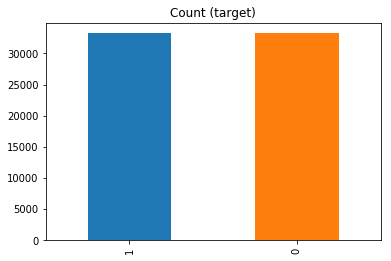

In [103]:
#extract the observations with class zero, equal to the number of obervations equal
df_ontime_0_under = df_ontime_0.sample(count_ontime_1)

#create a new dataframe with the same number of values for our two classes
new_df = pd.concat([df_ontime_0_under, df_ontime_1], axis=0)
new_df = new_df.reset_index()

print('Random under-sampling:')
print(new_df.on_time.value_counts())

new_df.on_time.value_counts().plot(kind='bar', title='Count (target)')

In [104]:
#taking a quick glimpse of new_df
new_df.head()

,index,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,15859,6/1/2017 6:03,0,Q2,165 ST/TERMINAL,40.707832,-73.795425,BELMONT PK 225 ST,40.711597,-73.729149,...,at stop,0,6/1/2017 6:03,6:01:14,NaN,2017-06-01 06:03:00,2017-06-01 06:01:14,1969-12-31 23:58:14,58,0
1,73068,6/1/2017 9:54,0,Bx41-SBS,3 AVE/WESTCHESTER AV,40.816803,-73.916328,SELECT BUS SERVICE WLIMSBRDG GUN HILL RD,40.877762,-73.865990,...,< 1 stop away,763,6/1/2017 9:57,9:55:50,NaN,2017-06-01 09:57:00,2017-06-01 09:55:50,1969-12-31 23:58:50,58,0
2,51039,6/1/2017 8:23,0,S44,YUKON AV/KMART DWY,40.575645,-74.167152,ST GEORGE FERRY,40.643742,-74.073212,...,approaching,82,6/1/2017 8:24,8:23:00,NaN,2017-06-01 08:24:00,2017-06-01 08:23:00,1969-12-31 23:59:00,59,0
3,91046,6/1/2017 11:14,0,Q58,PALMETTO ST/MYRTLE AV,40.700176,-73.910255,LTD FLUSHING MAIN ST,40.757343,-73.829361,...,< 1 stop away,363,6/1/2017 11:15,11:03:52,NaN,2017-06-01 11:15:00,2017-06-01 11:03:52,1969-12-31 23:48:52,48,0
4,33180,6/1/2017 7:24,1,Bx7,RIVERDALE AV/W 263 ST,40.912365,-73.902702,WASHINGTON HTS 168 ST via BWAY,40.839813,-73.939743,...,< 1 stop away,189,6/1/2017 7:25,7:20:00,NaN,2017-06-01 07:25:00,2017-06-01 07:20:00,1969-12-31 23:55:00,55,0


In [105]:
#exploring the 'OriginName' column
new_df.OriginName.describe()

count                          66414
unique                           458
top       ELTINGVILLE/TRANSIT CENTER
freq                            1303
Name: OriginName, dtype: object

It's important to know exactly how many different origin points we have in our data; by subsetting the "OriginName" column, we see that there are 457 unique origin points.  Next I will subset the data based on the two different values of the output variable, "on_time", to see if there is any relation between the Origin point of the bus and whether its on time or not.

Before performing any additional pre processing or feature creation, I will create a machine learing model with a decision tree to get an idea of the accuracy of the model at this point.

In [106]:
#creating two subsets of the dataframe; new_df_0 represents the subset with buses not on time, and new_df_1
# represents the subset with buses on time.
new_df_0 = new_df[new_df['on_time'] == 0]
new_df_1 = new_df[new_df['on_time'] == 1]


In [107]:
#exploring the PublishedLineName column
print(new_df_0.PublishedLineName.describe())
print(new_df_1.PublishedLineName.describe())


count     33207
unique      233
top         Q58
freq        586
Name: PublishedLineName, dtype: object
count     33207
unique      233
top          B6
freq        896
Name: PublishedLineName, dtype: object


In [108]:
#exploring the DestinationName column
print(new_df_0.DestinationName.describe())
print(new_df_1.DestinationName.describe())

count                        33207
unique                         505
top       WASHINGTON HTS GW BRIDGE
freq                           497
Name: DestinationName, dtype: object
count               33207
unique                510
top       ST GEORGE FERRY
freq                  486
Name: DestinationName, dtype: object


In [109]:
#exploring the 'OriginName' column for those buses that did not make it to their destinations on time.
new_df_0.OriginName.describe()

count             33207
unique              450
top       E 126 ST/2 AV
freq                648
Name: OriginName, dtype: object

In [110]:
#exploring the 'OriginName' column for those buses that made it on time.
new_df_1.OriginName.describe()

count                          33207
unique                           446
top       ELTINGVILLE/TRANSIT CENTER
freq                             742
Name: OriginName, dtype: object

Here I'm assuming the column "OriginName" to represent a bus stop, defined by the street intersection at which that bus stop is located at, from where each bus's route started, for each recorded observation in the data.

After subsetting the dataframe based on the binary values of the output variable, 'on_time', I noticed that the two subsets of the dataframe had similar number of unique "OriginNames; 448 out of 459 for the subset representing buses that were delayed and 446 out of 459 for the subset of data representing buses that were on time.  This suggests that both of the separate subsets had observations from almost all of the same bus stops, and that no one particular route was either always on time or always delayed.  Further analysis of the "OriginName" column below may help us see a pattern between the starting point (OriginName) of a bus's route and whether that bus was on time or not.

In [111]:
#examing the top ten value_counts of dataframe new_df_0.
new_df_1.OriginName.value_counts().head(20)

ELTINGVILLE/TRANSIT CENTER                 742
FLATBUSH AV/KINGS PLAZA                    566
HARWAY AV/BAY 37 ST                        534
MERRICK BL/ARCHER AV                       521
138 ST/37 AV                               404
W 179 ST/BROADWAY                          385
JFK AIRPORT/TERMINAL 5 AirTrain STATION    337
STILLWELL TERMINAL BUS LOOP                333
E 126 ST/2 AV                              313
BRICKTOWN SHOPPING/CENTER                  311
SHORE RD/4 AV                              304
LIVONIA AV/ASHFORD ST                      272
SPRINGFIELD BL / 119 AV                    271
LINCOLN RD/FLATBUSH AV                     269
ROCKAWAY AV/HEGEMAN AV                     253
PALMETTO ST/MYRTLE AV                      250
TEARDROP/LAYOVER                           226
WOODROW RD/VINELAND AV                     221
HILLSIDE AV/268 ST                         215
RIVERDALE AV/W 263 ST                      214
Name: OriginName, dtype: int64

In [112]:
#examining the top ten value_counts of dataframe new_df_0
new_df_0.OriginName.value_counts().head(20)

E 126 ST/2 AV                   648
ELTINGVILLE/TRANSIT CENTER      561
W 179 ST/BROADWAY               453
MERRICK BL/ARCHER AV            440
FLATBUSH AV/KINGS PLAZA         369
W FARMS RD/WESTCHESTER AV       335
ASTOR PL/3 AV                   328
41 RD/MAIN ST                   315
4 AV/E 10 ST                    304
BROADWAY/ISHAM ST               287
138 ST/37 AV                    286
HARWAY AV/BAY 37 ST             271
3 AV/E FORDHAM RD               271
BOSTON RD/E 180 ST              268
TEARDROP/LAYOVER                267
PALMETTO ST/MYRTLE AV           264
EARHART LA/ERSKINE PL           259
W 32 ST/7 AV                    245
CADMAN PLAZA WEST/JOHNSON ST    245
ALABAMA AV / FULTON ST          242
Name: OriginName, dtype: int64

After examining the two lists of "OriginName" value counts above, I noticed that the two lists from the separate subsets of the data share alot of the same bus stop names.  Bus stops (OriginName) such as E 126 ST/2 AV, ELTINGVILLE/TRANSIT CENTER, MERRICK BL/ARCHER AV, FLATBUSH AV/KINGS PLAZA, HARWAY AV/BAY 37 ST, and TEARDROP/LAYOVER were involved with alot of delays but also alot of buses that made it to their destination on time.  Considering that this data is regarding New York City, this may suggest that their is another underlying factor causing delays, such as high traffic on the roads due to seasonality or caused by special events at or near some of the specific bus stops that I mentioned here. 

Aside from this, it should be noted that of the 20 Origin names in the second list of value counts (which represents those OriginNames that were related to those buses being delayed) 11 are unique; that is they are not in the top 20 list of value counts for origin names that were related to those buses that were on time.  Names such as W FARMS RD/WESTCHESTER AV, BROADWAY/ISHAM ST, ASTOR PL/3 AV, AND 41 RD/MAIN ST, just to name a few.


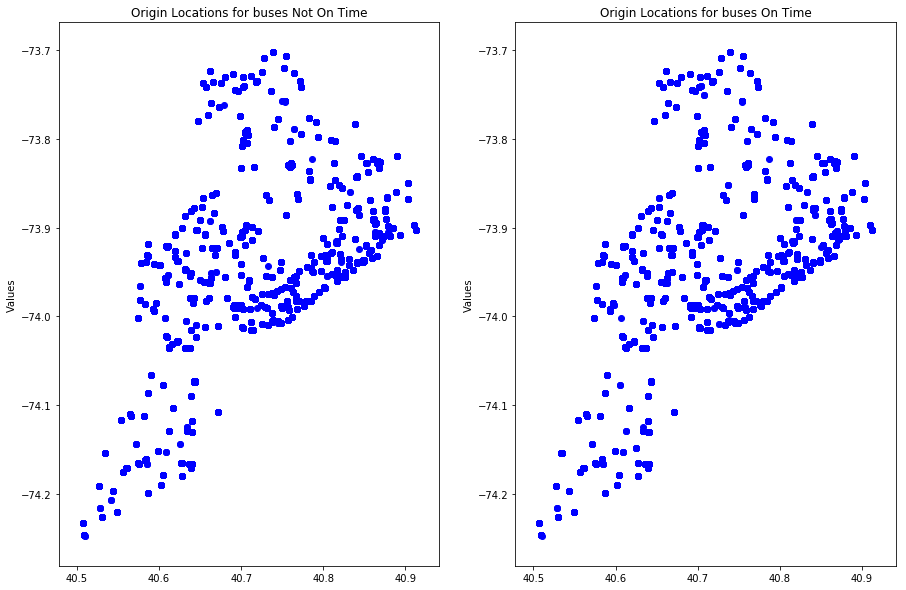

In [113]:
#making two scatter plots to show the origin locations of buses on time, and not on time, using origin latitude and origin
#longitude

#setting figure size
plt.figure(figsize=(15,10))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=new_df_0.OriginLat, y=new_df_0.OriginLong, color='blue')
plt.ylabel('Values')
plt.title('Origin Locations for buses Not On Time')

plt.subplot(1, 2, 2)
plt.scatter(x=new_df_1.OriginLat, y=new_df_1.OriginLong, color='blue')
plt.ylabel('Values')
plt.title('Origin Locations for buses On Time')
plt.show()

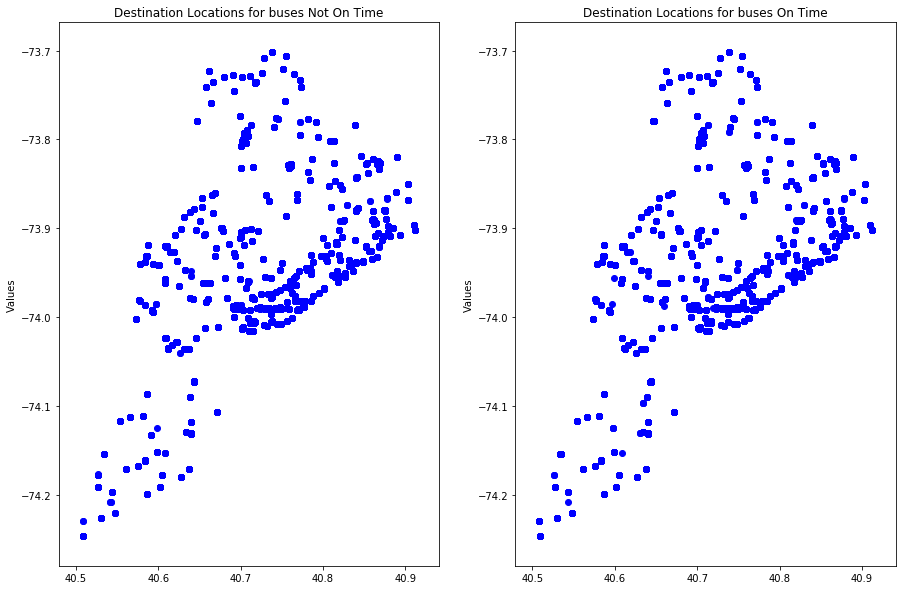

In [114]:
#making two scatter plots to show the origin locations of buses on time, and not on time, using origin latitude and origin
#longitude

#setting figure size
plt.figure(figsize=(15,10))

#making a plot figure that will have one row with two plots in each row
plt.subplot(1, 2, 1)
plt.scatter(x=new_df_0.DestinationLat, y=new_df_0.DestinationLong, color='blue')
plt.ylabel('Values')
plt.title('Destination Locations for buses Not On Time')

plt.subplot(1, 2, 2)
plt.scatter(x=new_df_1.DestinationLat, y=new_df_1.DestinationLong, color='blue')
plt.ylabel('Values')
plt.title('Destination Locations for buses On Time')
plt.show()

The two sets of scatterplot show the origin locations and destination locations using latitude and longitude for all buses, on time and those not on time, from the dataset.  As you can see, they are near identical for both scenarios, which further states that the bus route in of itself was not the sole factor for causing a bus to be on time to its destination or delayed.

In [115]:
new_df_0.DirectionRef.value_counts()

0    16657
1    16550
Name: DirectionRef, dtype: int64

In [116]:
new_df_1.DirectionRef.value_counts()

0    17471
1    15736
Name: DirectionRef, dtype: int64

In [117]:
new_df.head()

,index,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,...,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,Unnamed: 17,expected_arrival,scheduled_arrival,delay,delay_minute,on_time
0,15859,6/1/2017 6:03,0,Q2,165 ST/TERMINAL,40.707832,-73.795425,BELMONT PK 225 ST,40.711597,-73.729149,...,at stop,0,6/1/2017 6:03,6:01:14,NaN,2017-06-01 06:03:00,2017-06-01 06:01:14,1969-12-31 23:58:14,58,0
1,73068,6/1/2017 9:54,0,Bx41-SBS,3 AVE/WESTCHESTER AV,40.816803,-73.916328,SELECT BUS SERVICE WLIMSBRDG GUN HILL RD,40.877762,-73.865990,...,< 1 stop away,763,6/1/2017 9:57,9:55:50,NaN,2017-06-01 09:57:00,2017-06-01 09:55:50,1969-12-31 23:58:50,58,0
2,51039,6/1/2017 8:23,0,S44,YUKON AV/KMART DWY,40.575645,-74.167152,ST GEORGE FERRY,40.643742,-74.073212,...,approaching,82,6/1/2017 8:24,8:23:00,NaN,2017-06-01 08:24:00,2017-06-01 08:23:00,1969-12-31 23:59:00,59,0
3,91046,6/1/2017 11:14,0,Q58,PALMETTO ST/MYRTLE AV,40.700176,-73.910255,LTD FLUSHING MAIN ST,40.757343,-73.829361,...,< 1 stop away,363,6/1/2017 11:15,11:03:52,NaN,2017-06-01 11:15:00,2017-06-01 11:03:52,1969-12-31 23:48:52,48,0
4,33180,6/1/2017 7:24,1,Bx7,RIVERDALE AV/W 263 ST,40.912365,-73.902702,WASHINGTON HTS 168 ST via BWAY,40.839813,-73.939743,...,< 1 stop away,189,6/1/2017 7:25,7:20:00,NaN,2017-06-01 07:25:00,2017-06-01 07:20:00,1969-12-31 23:55:00,55,0


In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66414 entries, 0 to 66413
Data columns (total 24 columns):
index                        66414 non-null int64
RecordedAtTime               66414 non-null object
DirectionRef                 66414 non-null int64
PublishedLineName            66414 non-null object
OriginName                   66414 non-null object
OriginLat                    66414 non-null float64
OriginLong                   66414 non-null float64
DestinationName              66414 non-null object
DestinationLat               66414 non-null float64
DestinationLong              66414 non-null float64
VehicleRef                   66414 non-null object
VehicleLocation.Latitude     66414 non-null float64
VehicleLocation.Longitude    66414 non-null float64
NextStopPointName            66414 non-null object
ArrivalProximityText         66414 non-null object
DistanceFromStop             66414 non-null object
ExpectedArrivalTime          66414 non-null object
ScheduledArrivalTime

In [119]:
new_df['DistanceFromStop'].isnull().sum()

0

In [120]:
#checking dataframe to see which rows have non numeric data. False means its not int or float
#new_df.applymap(lambda x: isinstance(x, (int, float)))

In [121]:
#converting 'DistanceFromStop' to numeric, and coercing errors which will make errors to nan, which i will correct below
new_df['DistanceFromStop'] = pd.to_numeric(new_df['DistanceFromStop'], errors='coerce')

In [122]:
#the total number of null items in "DistanceFromStop"
new_df['DistanceFromStop'].isnull().sum()

4

In [123]:
#rechecking the dtype of 'DistanceFromStop'
new_df['DistanceFromStop'].dtype


dtype('float64')

In [124]:
#checking the column shape
new_df['DistanceFromStop'].shape

(66414,)

In [125]:
#this just gave me a long pandas series
#print(np.isnan(new_df['DistanceFromStop']))

In [126]:
#one way to check which rows have the nan or null values in "DistanceFromStop" column, by subsetting database for null values
print(new_df[pd.to_numeric(new_df['DistanceFromStop'], errors='coerce').isnull()])

       index  RecordedAtTime  DirectionRef PublishedLineName    OriginName  \
53965  56710   6/1/2017 8:44             0                M5  6 AV/W 31 ST   
56430  64872   6/1/2017 9:13             0                M5  6 AV/W 31 ST   
61000  80634  6/1/2017 10:24             0                M5  6 AV/W 31 ST   
65636  97070  6/1/2017 11:54             0                M5  6 AV/W 31 ST   

       OriginLat  OriginLong                       DestinationName  \
53965  40.748043   -73.98896  LIMITED WASHINGTON HEIGHTS GW BRIDGE   
56430  40.748043   -73.98896  LIMITED WASHINGTON HEIGHTS GW BRIDGE   
61000  40.748043   -73.98896  LIMITED WASHINGTON HEIGHTS GW BRIDGE   
65636  40.748043   -73.98896  LIMITED WASHINGTON HEIGHTS GW BRIDGE   

       DestinationLat  DestinationLong   ...   ArrivalProximityText  \
53965       40.848263       -73.937454   ...               for GEO)   
56430       40.848263       -73.937454   ...               for GEO)   
61000       40.848263       -73.937454   ... 

In [127]:
#dropping the Nan values.  I could have also replaced the NaN values with with fillna(0)
new_df = new_df.drop(new_df.index[[53965,56430,61000,65636]])

In [128]:
#rechecking the shape of the 'DistanceFromStop' column
new_df['DistanceFromStop'].shape

(66410,)

In [129]:
new_df.columns

Index(['index', 'RecordedAtTime', 'DirectionRef', 'PublishedLineName',
       'OriginName', 'OriginLat', 'OriginLong', 'DestinationName',
       'DestinationLat', 'DestinationLong', 'VehicleRef',
       'VehicleLocation.Latitude', 'VehicleLocation.Longitude',
       'NextStopPointName', 'ArrivalProximityText', 'DistanceFromStop',
       'ExpectedArrivalTime', 'ScheduledArrivalTime', 'Unnamed: 17',
       'expected_arrival', 'scheduled_arrival', 'delay', 'delay_minute',
       'on_time'],
      dtype='object')

In [130]:
#dropping some columns and splitting the data and creating the initial train and test splits.
X = new_df.drop(['RecordedAtTime', 'ArrivalProximityText', 'Unnamed: 17', 'PublishedLineName', 'VehicleRef', 
                 'NextStopPointName', 'ExpectedArrivalTime', 'ScheduledArrivalTime',
                 'expected_arrival', 'scheduled_arrival', 'delay', 'delay_minute', 'on_time', 'OriginName',
                 'DestinationName'], 1)

#getting dummy values for categorical data, and creating dataframe of the independent (predictor) values
#XD_df = pd.get_dummies(X, columns=['OriginName', 'DestinationName'])


Y = new_df['on_time']



In [131]:
#checking type
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [132]:
#checking which column has NaN value
X.isnull().sum().sum()

0

In [ ]:
#checking for location of NaN values in "DistanceFromStop" column
#print(XD_df[pd.to_numeric(XD_df['DistanceFromStop'], errors='coerce').isnull()])

In [ ]:
#dropping the Nan values.  I could have also replaced the NaN values with with fillna(0)
#XD_df = XD_df.drop(XD_df.index[4606])
#Y = Y.drop(Y.index[4606])

In [133]:
X.shape


(66410, 9)

In [134]:
Y.shape

(66410,)

In [135]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=.3, random_state=20)
print(test_X.shape)
print(test_Y.shape)

#checking for any NaN values in our data.
print(np.isnan(train_Y).any())
print(np.isnan(train_X).any().sum())
print(np.isnan(test_Y).any())
print(np.isnan(test_X).any().sum())

(19923, 9)
(19923,)
False
0
False
0


In [136]:
# perform grid search to find the optimal parameters for our decision tree model
dtree = tree.DecisionTreeClassifier(random_state=2)
tree_param_grid = {'max_depth':[4,6,10], 'min_samples_split':[6,8,10,15], 'max_features':[2,4,6,8], 
                   'criterion':['gini', 'entropy']}
dtree_grid = GridSearchCV(dtree, tree_param_grid, cv=5, verbose=3)
dtree_grid.fit(train_X, train_Y)
print('Best parameters for decision tree:', dtree_grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, score=0.5579694557969456, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, score=0.5523768552376855, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, score=0.5556631171345595, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, score=0.537700333440895, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, score=0.5418952350220502, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=8, score=0.5579694557969456, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=8, score=0.5523768552376855, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=8, score=0.555663

[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, score=0.5628697429278262, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=8 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, score=0.574271270302248, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=10, score=0.5741019574101958, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=10, score=0.5721660572166057, total=   0.0s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=10, score=0.5735183392492201, total=   0.1s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=10, score=

[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=10, score=0.5674948908249973, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=15 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=15, score=0.5684018068401807, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=15 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=15, score=0.5756076575607657, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=15 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=15, score=0.5729805313542002, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=15 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=15, score=0.563945358717866, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=15 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=15, sco

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=15, score=0.5752393245132839, total=   0.1s
[CV] criterion=gini, max_depth=6, max_features=8, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=8, min_samples_split=6, score=0.5803398580339858, total=   0.2s
[CV] criterion=gini, max_depth=6, max_features=8, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=8, min_samples_split=6, score=0.5807700580770058, total=   0.2s
[CV] criterion=gini, max_depth=6, max_features=8, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=8, min_samples_split=6, score=0.5766376250403356, total=   0.2s
[CV] criterion=gini, max_depth=6, max_features=8, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=8, min_samples_split=6, score=0.5758846939873077, total=   0.2s
[CV] criterion=gini, max_depth=6, max_features=8, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=8, min_samples_split=6, score=0.5791

[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, score=0.5828761966225664, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, score=0.5961497096149709, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, score=0.5887287588728759, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, score=0.5864257287296978, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, score=0.5872862213617296, total=   0.1s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=8 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, sc

[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_split=8, score=0.5880391524147575, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_split=10, score=0.5919552591955259, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_split=10, score=0.5884061088406108, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_split=10, score=0.5827686350435625, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_split=10, score=0.589975260836829, total=   0.3s
[CV] criterion=gini, max_depth=10, max_features=8, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_features=8, min_samples_spl

[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=10, score=0.574486393460256, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=15, score=0.5771133577113358, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=15, score=0.5722736072273608, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=15, score=0.5730880929332043, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=15, score=0.563837797138862, total=   0.0s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_featu

[CV]  criterion=entropy, max_depth=4, max_features=8, min_samples_split=15, score=0.5619016887167904, total=   0.1s
[CV] criterion=entropy, max_depth=4, max_features=8, min_samples_split=15 
[CV]  criterion=entropy, max_depth=4, max_features=8, min_samples_split=15, score=0.5736259008282242, total=   0.1s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=6, score=0.5647451064745106, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=6, score=0.5788341578834157, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=6, score=0.57405614714424, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=2, 

[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, score=0.5808325266214908, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, score=0.5754544476712918, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, score=0.5733032160912123, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=8, score=0.5882985588298559, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=8, score=0.5819531081953108, total=   0.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=8 
[CV]  criterion=entropy, max_depth=6, max_features=6, m

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, score=0.5785115078511508, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, score=0.5837366892545982, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, score=0.585242551360654, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, score=0.5893298913628052, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=10, score=0.5785115078511508, total=   0.1s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_

[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=8, score=0.5935247929439604, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, score=0.594428909442891, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, score=0.5845343084534308, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, score=0.5928794234699365, total=   0.3s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, score=0.579649349252447, total=   0.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10,

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.9min finished


Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_split': 10}


In [137]:
print('Best parameters for decision tree:', dtree_grid.best_params_)
print('Best score for decision tree: ', dtree_grid.best_score_)

Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_split': 10}
Best score for decision tree:  0.5930260072708499


In [138]:
# Create the first model by Initializing and training our tree before any additional preprocessing
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=10,
    min_samples_split=10,
    random_state = 201
)

#set start time
start_time_tree = datetime.datetime.now()

#train our tree
decision_tree.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_dtree = decision_tree.predict(test_X)

#get accuracy score from our model
print('Accuracy score for decision tree Model: ' + str(metrics.accuracy_score(test_Y, y_pred_dtree)))

#calculate end time
end_time_tree = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_tree - start_time_tree))
print()

#get accuracy score of decision tree
tree_score = cross_val_score(decision_tree, X, Y, cv=10, scoring='accuracy')
print(tree_score)
print('Average cross validated score from our decision tree model is: ' + str(np.mean(tree_score)))

Accuracy score for decision tree Model: 0.5899211966069368

Duration: 0:00:00.505734

[0.49728997 0.49984944 0.49939777 0.50067761 0.50188225 0.50233399
 0.50007529 0.50271084 0.50135542 0.50060241]
Average cross validated score from our decision tree model is: 0.5006174993447841


# Logistic Regression

In [139]:
#initialize and train our model
LogReg = LogisticRegression(C=1e9, random_state=12)

#set start time
start_time4 = datetime.datetime.now()

#fit and train the model
LogReg.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
y_pred_LogReg = LogReg.predict(test_X)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model: ' + str(metrics.accuracy_score(test_Y, y_pred_LogReg)))

#calculate end time
end_time4 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time4 - start_time4))
print()

#get average accuracy score using cross validation
LogReg_cvs = cross_val_score(LogReg, X, Y, cv=10, scoring='accuracy')
print(LogReg_cvs)

print('Average cross validated score from our log regression model is: ' + str(np.mean(LogReg_cvs)))

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score for Logistic regression Model: 0.5456005621643327

Duration: 0:00:00.265463



C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

[0.55510388 0.76663656 0.76528154 0.76584852 0.76750489 0.53395573
 0.27450685 0.28870482 0.28072289 0.28388554]
Average cross validated score from our log regression model is: 0.5282151225910507


# PCA

In [140]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o

X_scaled = StandardScaler().fit_transform(X)

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [141]:
#Apply PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X_scaled)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

print(comp_no)
print(comp_var_ratio)
#print(p_components)

6
[0.42875424 0.16139335 0.14347956 0.11152908 0.103361   0.02273595]


In [142]:
#pca data to dataframe
pca_df = pd.DataFrame(data=X_pca)
print(pca_df.head())
print(pca_df.shape)

          0         1         2         3         4         5
0 -1.992133 -1.481834  2.509747  0.675644 -0.356770 -0.279768
1 -1.896859  1.814189  0.378356 -0.600330  0.354572  0.079959
2  3.857129  1.143937  0.039131 -0.441820 -0.667736 -0.105380
3 -1.043932  0.166285  1.316199 -1.464287  0.671933 -0.081690
4 -2.252335  0.922396 -1.751075  0.879514 -0.321501 -0.244615
(66410, 6)


In [143]:
#After applying PCA, I split the data into a second set of train and test groups

train_X_pca, test_X_pca, train_Y_pca, test_Y_pca = train_test_split(X_pca, Y, test_size=.3, random_state=20)

# Random Forest

In [144]:
# perform grid search to find the optimal parameters for our random forest model, after applying PCA
rforest = ensemble.RandomForestClassifier(random_state=20)
forest_param_grid = {'n_estimators':[50,100], 'max_depth':[4,6,8,10], 'min_samples_split':[6,8,10,12], 
                     'max_features':[2,4,6], 'criterion':['entropy', 'gini']}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=10, verbose=3)
rforest_grid.fit(train_X, train_Y)
print('Best parameters for decision tree:', rforest_grid.best_params_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5832258064516129, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5959139784946237, total=   2.5s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.8s remaining:    0.0s


[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5833512583351258, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5852871585287158, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5792643579264358, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5856282271944923, total=   2.5s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.58218588

[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=8, n_estimators=100, score=0.5774526678141136, total=   5.2s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5825806451612904, total=   2.5s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.595268817204301, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5835663583566358, total=   2.6s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.

[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100, score=0.5787435456110155, total=   5.3s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100, score=0.576592082616179, total=   5.2s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100, score=0.5772375215146299, total=   5.2s
[CV] criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=2, min_samples_split=12, n_estimators=100, score=0.5770223752151463, total=   5.3s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, sco

[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5814153581415358, total=   9.5s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5768982576898257, total=   9.5s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5768072289156626, total=   9.5s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5770223752151463, total=   9.5s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0

[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5853763440860215, total=   9.6s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5860215053763441, total=   9.4s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5743170574317057, total=   9.4s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5809851580985158, total=   9.5s
[CV] criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100

[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=50, score=0.5709982788296041, total=   6.6s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=50, score=0.5770223752151463, total=   6.8s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=50, score=0.5787435456110155, total=   6.8s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5810752688172043, total=  13.4s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5840

[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50, score=0.5762529576252957, total=   6.5s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50, score=0.5783132530120482, total=   6.7s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50, score=0.5725043029259896, total=   6.6s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50, score=0.5709982788296041, total=   6.5s
[CV] criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=4, max_features=6, min_samples_split=12, n_estimators=50, score=0

[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50, score=0.6006451612903225, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50, score=0.5941062594106259, total=   3.6s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50, score=0.5960421596042159, total=   3.6s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50, score=0.5906646590664659, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=8, n_estimators=50, score=0.59165232

[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=10, n_estimators=100, score=0.5867039586919105, total=   7.4s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=10, n_estimators=100, score=0.5834767641996558, total=   7.4s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50, score=0.5870967741935483, total=   3.7s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50, score=0.6017204301075268, total=   3.6s
[CV] criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50, scor

[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100, score=0.5892857142857143, total=  13.4s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100, score=0.5875645438898451, total=  13.6s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100, score=0.5815404475043029, total=  13.5s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100, score=0.5914371772805508, total=  13.5s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=6, n_estimators=100, score=0

[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100, score=0.5887287588728759, total=  13.2s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100, score=0.594536459453646, total=  13.1s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100, score=0.5919552591955259, total=  12.7s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100, score=0.5886402753872634, total=  13.2s
[CV] criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=4, min_samples_split=10, n_estimators=100,

[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=50, score=0.5922977624784854, total=   9.5s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100, score=0.5933333333333334, total=  19.3s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100, score=0.593763440860215, total=  19.3s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100, score=0.5878683587868359, total=  19.1s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=6, n_estimators=100, score=0.6

[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50, score=0.5905765920826161, total=   9.2s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50, score=0.5821858864027539, total=   9.7s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50, score=0.5854130808950087, total=   9.6s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=50, score=0.5879948364888123, total=   9.7s
[CV] criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=6, max_features=6, min_samples_split=10, n_estimators=100, score

[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50, score=0.6091632609163261, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50, score=0.602495160249516, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50, score=0.6082185886402753, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50, score=0.5998278829604131, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=6, n_estimators=50, score=0.598752151

[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50, score=0.6006451612903225, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50, score=0.6047311827956989, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50, score=0.6048612604861261, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50, score=0.610668961066896, total=   1.6s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=10, n_estimators=50, score=0.

[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=12, n_estimators=100, score=0.5976764199655766, total=   3.3s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=12, n_estimators=100, score=0.6021944922547332, total=   3.3s
[CV] criterion=entropy, max_depth=8, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=2, min_samples_split=12, n_estimators=100, score=0.5991824440619621, total=   3.3s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=6, n_estimators=50, score=0.6064516129032258, total=   3.0s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=6, n_estimators=50, score=

[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100, score=0.6052914605291461, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100, score=0.6045611015490534, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100, score=0.5985370051635112, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100, score=0.5987521514629949, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=8, n_estimators=100, score=0

[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100, score=0.6053763440860215, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100, score=0.6035706603570661, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100, score=0.6145407614540761, total=   6.2s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100, score=0.604431060443106, total=   6.1s
[CV] criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=4, min_samples_split=12, n_estimators=100,

[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=50, score=0.6062822719449226, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=50, score=0.6015490533562823, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100, score=0.6103225806451613, total=   9.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100, score=0.6058064516129033, total=   9.0s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=8, n_estimators=100, score=0.59

[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50, score=0.6097246127366609, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50, score=0.5972461273666093, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50, score=0.5972461273666093, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50, score=0.6071428571428571, total=   4.4s
[CV] criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=8, max_features=6, min_samples_split=12, n_estimators=50, score=0

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50, score=0.6110991611099161, total=   2.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50, score=0.6231447623144762, total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50, score=0.6102387610238761, total=   2.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50, score=0.6219879518072289, total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=8, n_estimators=50, score=0

[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=10, n_estimators=100, score=0.6101549053356282, total=   3.9s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50, score=0.6124731182795699, total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50, score=0.6182795698924731, total=   2.0s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50, score=0.6085179608517961, total=   1.9s
[CV] criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=2, min_samples_split=12, n_estimators=5

[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100, score=0.6075731497418244, total=   7.5s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100, score=0.612736660929432, total=   7.4s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100, score=0.6209122203098106, total=   7.4s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=6, n_estimators=100, score=0.6230636833046471, total=   7.5s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=8, n_estimators=50, s

[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100, score=0.6261561626156162, total=   7.5s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100, score=0.6128199612819961, total=   7.4s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100, score=0.6226333907056799, total=   7.4s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100, score=0.6075731497418244, total=   7.4s
[CV] criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=4, min_samples_split=10, n_estim

[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100, score=0.6245161290322581, total=  10.9s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100, score=0.6137634408602151, total=  11.0s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100, score=0.6160464616046462, total=  10.9s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100, score=0.6317487631748763, total=  10.9s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=6, n_estimators=100

[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=50, score=0.6159638554216867, total=   5.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=50, score=0.6181153184165232, total=   5.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=50, score=0.6198364888123924, total=   5.4s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=100, score=0.6197849462365591, total=  10.8s
[CV] criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, max_features=6, min_samples_split=10, n_estimators

[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5807700580770058, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5869191049913941, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5828313253012049, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5770223752151463, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=6, n_estimators=50, score=0.5796041308089501, total=   0.7s
[CV

[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5839965583996558, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5818455581845559, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5824908582490859, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5869191049913941, total=   0.7s
[CV] criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.5854130808950087, total=  

[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, score=0.5827956989247312, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, score=0.5873118279569892, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, score=0.5730264573026457, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, score=0.5837814583781459, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=6, n_estimators=50, score=0.5794794579479458, total=   1.2s
[CV

[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5772375215146299, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=8, n_estimators=100, score=0.5798192771084337, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50, score=0.5823655913978495, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50, score=0.5873118279569892, total=   1.2s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=10, n_estimators=50, score=0.5730264573026457, total=  

[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5778829604130808, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5731497418244407, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5768072289156626, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=4, min_samples_split=12, n_estimators=100, score=0.5804647160068847, total=   2.5s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=6, n_estimators=50, score=0.58, total=   1.7s
[CV

[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5766831576683158, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5787435456110155, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5731497418244407, total=   3.5s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5699225473321858, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=8, n_estimators=100, score=0.5768072289156626, total=  

[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100, score=0.5713056571305657, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100, score=0.5799096579909658, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100, score=0.5764680576468058, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100, score=0.5780981067125646, total=   3.6s
[CV] criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=4, max_features=6, min_samples_split=12, n_estimators=100, score=0.5733648881239243,

[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100, score=0.5898924731182795, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100, score=0.6002150537634409, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100, score=0.5936760593676059, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100, score=0.603785760378576, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=8, n_estimators=100, score=0.5928156592815659, total=   

[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50, score=0.5869191049913941, total=   0.9s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=50, score=0.5890705679862306, total=   0.9s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100, score=0.5851612903225807, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100, score=0.6015053763440861, total=   2.0s
[CV] criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=2, min_samples_split=12, n_estimators=100, score=0.5947515594751559, to

[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50, score=0.5858433734939759, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50, score=0.5854130808950087, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50, score=0.588855421686747, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=50, score=0.5920826161790017, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=8, n_estimators=100, score=0.5918279569892473, total=   3.5s
[C

[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50, score=0.593891159389116, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50, score=0.5920826161790017, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50, score=0.5854130808950087, total=   1.7s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50, score=0.5832616179001722, total=   1.8s
[CV] criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=4, min_samples_split=12, n_estimators=50, score=0.5847676419965576, total=   

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50, score=0.5891589589158959, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50, score=0.5960421596042159, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50, score=0.590879759087976, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50, score=0.5961703958691911, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=8, n_estimators=50, score=0.5912220309810671, total=   2.5s
[CV]

[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50, score=0.589247311827957, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50, score=0.5989247311827957, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50, score=0.5880834588083459, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50, score=0.597547859754786, total=   2.5s
[CV] criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=6, max_features=6, min_samples_split=12, n_estimators=50, score=0.590234459023446, total=   2.

[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=6, n_estimators=100, score=0.6054216867469879, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=6, n_estimators=100, score=0.6015490533562823, total=   2.4s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50, score=0.6051612903225806, total=   1.2s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50, score=0.6070967741935483, total=   1.2s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=8, n_estimators=50, score=0.6098085609808561, total=   1.2s


[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100, score=0.5983218588640276, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100, score=0.5998278829604131, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100, score=0.6013339070567987, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=10, n_estimators=100, score=0.5983218588640276, total=   2.5s
[CV] criterion=gini, max_depth=8, max_features=2, min_samples_split=12, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_features=2, min_samples_split=12, n_estimators=50, score=0.6043010752688172, t

[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100, score=0.602495160249516, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100, score=0.6067125645438899, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100, score=0.6009036144578314, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100, score=0.5963855421686747, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=6, n_estimators=100, score=0.6054216867469879, total=   

[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100, score=0.602710260271026, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100, score=0.6171219617121961, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100, score=0.6016347601634761, total=   4.5s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100, score=0.6080034423407917, total=   4.6s
[CV] criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=4, min_samples_split=10, n_estimators=100, score=0.6032702237521514, 

[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100, score=0.6079569892473118, total=   6.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100, score=0.6060215053763441, total=   6.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100, score=0.603785760378576, total=   6.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100, score=0.6177672617767261, total=   6.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=6, n_estimators=100, score=0.6048612604861261, total=   

[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=50, score=0.6099397590361446, total=   3.2s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=50, score=0.6006884681583476, total=   3.2s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.6120430107526882, total=   6.4s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.607741935483871, total=   6.5s
[CV] criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.600989460098946, tota

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50, score=0.6129518072289156, total=   1.5s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50, score=0.6077882960413081, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50, score=0.6097246127366609, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=50, score=0.6110154905335629, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=6, n_estimators=100, score=0.6120430107526882, total=

[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50, score=0.6102387610238761, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50, score=0.620697074010327, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50, score=0.6146729776247849, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50, score=0.6133820998278829, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=2, min_samples_split=10, n_estimators=50, score=0.6163941480206541, 

[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50, score=0.6219354838709678, total=   2.7s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50, score=0.6154011615401161, total=   2.6s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50, score=0.6304581630458163, total=   2.7s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50, score=0.6184125618412561, total=   2.7s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=6, n_estimators=50, score=0.6222030981067126, total=  

[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=8, n_estimators=100, score=0.6215576592082617, total=   5.4s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50, score=0.6223655913978494, total=   2.6s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50, score=0.615268817204301, total=   2.7s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50, score=0.6121746612174661, total=   2.7s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=10, n_estimators=50, score=0.6326091632609163, 

[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100, score=0.6118760757314974, total=   5.4s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100, score=0.6114457831325302, total=   5.4s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100, score=0.6211273666092944, total=   5.4s
[CV] criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=4, min_samples_split=12, n_estimators=100, score=0.6191910499139415, total=   5.4s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=6, n_estimators=50 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=6, n_estimators=50, score=0.614623655913

[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100, score=0.6199182619918262, total=   7.9s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100, score=0.6273666092943201, total=   7.9s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100, score=0.6125215146299484, total=   7.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100, score=0.6140275387263339, total=   8.0s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=8, n_estimators=100, score=0.6161790017211703,

[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100, score=0.6163440860215054, total=   7.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100, score=0.6162615616261562, total=   7.9s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100, score=0.6261561626156162, total=   7.9s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100, score=0.6158313615831361, total=   7.8s
[CV] criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=6, min_samples_split=12, n_estimators=100, score=0.62413941

[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 166.0min finished


Best parameters for decision tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_split': 10, 'n_estimators': 100}


In [145]:
print('Best score for Random Forest:', rforest_grid.best_score_)

Best score for Random Forest: 0.6200873362445415


In [147]:
#initialize and train our random forest model with PCA
rand_forest_pca = ensemble.RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, max_features=6,
                                              min_samples_split=10, random_state=300)

#set start time
start_time_rforest = datetime.datetime.now()

rand_forest_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
y_pred_rforest_pca = rand_forest_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Random Forest Model: ' + str(metrics.accuracy_score(test_Y_pca, y_pred_rforest)))

#calculate end time
end_time_rforest = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_rforest - start_time_rforest))
print()

#get average accuracy score of our random forest through cross validation
rforest_pca_cvs = cross_val_score(rand_forest_pca, X_pca, Y, cv=10, scoring='accuracy')
print(rforest_pca_cvs)
print('Average cross validated score from our Random Forest Model is: ' + str(np.mean(rforest_pca_cvs)))

Accuracy score for Random Forest Model: 0.6324850675099132

Duration: 0:00:15.804751

[0.32941885 0.38647998 0.44233665 0.37569643 0.33157657 0.31832555
 0.29076946 0.28253012 0.27921687 0.27801205]
Average cross validated score from our Random Forest Model is: 0.331436252425311


In [ ]:
# create confusion matrix for random forest and PCA
confusion_matrix(test_Y_pca, y_pred_rforest_pca)

In [ ]:
#Get AUC and create ROC
# predict probabilities
probs_rforest_pca = LogReg.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_rforest_pca = probs_rforest_pca[:, 1]
# calculate AUC
rforest_auc = roc_auc_score(test_Y_pca, probs_rforest_pca)
print('AUC Score: %.3f' % rforest_auc)
# calculate roc curve
fpr_rforest_pca, tpr_rforest_pca, thresholds_rforest_pca = roc_curve(test_Y_pca, probs_rforest_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rforest_pca, tpr_rforest_pca, marker='.')
# show the plot
plt.show()

In [ ]:
# perform classification report of the logistic regression model
class_names = ['Class_0', 'Class_1']
rforest_report = classification_report(test_Y_pca, y_pred_rforest_pca, target_names=class_names)
print(rforest_report)

# Gradient Boosting

In [ ]:
#Run gridsearchcv to find the best parameters for gradient boosting using PCA
gboost_param_grid = {'n_estimators':[200,400,600], 'max_depth':[2,4,6], 'min_samples_leaf': [3, 5, 9], 
                     'learning_rate': [.05, .02, .01], 'subsample': [.7, .8, .9]}
gb_model = ensemble.GradientBoostingClassifier(random_state=67)

gb_grid = GridSearchCV(gb_model, gboost_param_grid, cv=5)
gb_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for Gradient Boost Model are:', gb_grid.best_params_)

In [ ]:
print('Best parameters for Gradient Boost Model are:', gb_grid.best_params_)
print('Best score for Gradient Boost Model are:', gb_grid.best_score_)

In [ ]:
# Initialize and fit the model using PCA
Grad_boost_pca = ensemble.GradientBoostingClassifier(learning_rate=0.02, max_depth=2, min_samples_leaf=5, 
                                                 n_estimators=200, subsample=0.7, random_state=67)

#set start time
start_time_gb = datetime.datetime.now()

#fit and train the model
Grad_boost_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
y_pred_Gboost_pca = Grad_boost.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Gradient Boost Model: ' + str(metrics.accuracy_score(test_Y_pca, y_pred_Gboost_pca)))

#calculate end time
end_time_gb = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time_gb - start_time_gb))
print()

#get average accuracy score using cross validation
Grad_boost_cvs_pca = cross_val_score(Grad_boost_pca, X_pca, Y, cv=5, scoring='accuracy')
print(Grad_boost_cvs_pca)

print('Average cross validated score from our Gradient Boosting model is: ' + str(np.mean(Grad_boost_cvs_pca)))

In [ ]:
#Get AUC and create ROC
# predict probabilities
probs_Gboost_pca = Grad_boost_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_Gboost_pca = probs_Gboost_pca[:, 1]
# calculate AUC
Gboost_auc = roc_auc_score(test_Y_pca, probs_Gboost_pca)
print('AUC Score: %.3f' % Gboost_auc)
# calculate roc curve
fpr_Gboost_pca, tpr_Gboost_pca, thresholds_Gboost_pca = roc_curve(test_Y_pca, probs_Gboost_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_Gboost_pca, tpr_Gboost_pca, marker='.')
# show the plot
plt.show()

print()
# perform classification report of the Gradient Boosting model
class_names = ['Class_0', 'Class_1']
Gboost_report = classification_report(test_Y_pca, y_pred_Gboost_pca, target_names=class_names)
print(Gboost_report)
print()
#confusion matrix
print('Confusion Matrix:')
confusion_matrix(test_Y_pca, y_pred_Gboost_pca)


# Logistic Regression

In [ ]:
#initialize and train our model after PCA
LogReg_pca = LogisticRegression(C=1e9, random_state=12)

#set start time
start_time4 = datetime.datetime.now()

#fit and train the model
LogReg_pca.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
y_pred_LogReg_pca = LogReg_pca.predict(test_X_pca)

#get accuracy score from our model
print('Accuracy score for Logistic regression Model after pca: ' + str(metrics.accuracy_score(test_Y_pca, y_pred_LogReg_pca)))

#calculate end time
end_time4 = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(end_time4 - start_time4))
print()

#get average accuracy score using cross validation
LogReg_cvs_pca = cross_val_score(LogReg_pca, X_pca, Y, cv=10, scoring='accuracy')
print(LogReg_cvs_pca)

print('Average cross validated score from our log regression model is: ' + str(np.mean(LogReg_cvs_pca)))

In [ ]:
#Get AUC and create ROC
# predict probabilities
probs_LogReg_pca = LogReg_pca.predict_proba(test_X)
# keep probabilities for the positive outcome only
probs_LogReg_pca = probs_LogReg_pca[:, 1]
# calculate AUC
LogReg_pca_auc = roc_auc_score(test_Y_pca, probs_LogReg_pca)
print('AUC Score: %.3f' % LogReg_pca_auc)
# calculate roc curve
fpr_LogReg_pca, tpr_LogReg_pca, thresholds_LogReg_pca = roc_curve(test_Y_pca, probs_LogReg_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_LogReg_pca, tpr_LogReg_pca, marker='.')
# show the plot
plt.show()
print()

# perform classification report of the logistic regression model
class_names = ['Class_0', 'Class_1']
LogReg_report_pca = classification_report(test_Y_pca, y_pred_LogReg_pca, target_names=class_names)
print(LogReg_report_pca)
print()

# create confusion matrix
confusion_matrix(test_Y_pca, y_pred_LogReg_pca)

# KNN

In [ ]:
# perform grid search to find the optimal parameters for our KNN model using full data.
KNN_model = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,10,15], 'weights':['uniform', 'distance']}
KNN_grid = GridSearchCV(KNN_model, KNN_params, cv=5)
KNN_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for data:', KNN_grid.best_params_)

In [ ]:
#initialize and train our model using the training set
KNN_pca = KNeighborsClassifier(n_neighbors=5, weights='distance')

#set start time
starttime_knn = datetime.datetime.now()

#fit and train the model
KNN_pca.fit(train_X_pca,train_Y_pca)

#Make predictions using test_X, and store results in new variable
y_pred_KNN_pca = KNN_pca.predict(test_X_pca)

print('Accuracy score for KNN Model: ' + str(metrics.accuracy_score(test_Y_pca, y_pred_KNN_pca)))

#calculate end time
endtime_knn = datetime.datetime.now()

#print the execution run time for our model
print('\nDuration: {}'.format(endtime_knn - starttime_knn))
print()


KNN_cvs_pca = cross_val_score(KNN_pca, X_pca, Y, cv=5, scoring='accuracy')
print(KNN_cvs_pca)
print('Average cross validated score from our KNN model is: ' + str(np.mean(KNN_cvs_pca)))


In [ ]:
#Get AUC and create ROC
# predict probabilities
probs_KNN_pca = KNN_pca.predict_proba(test_X_pca)
# keep probabilities for the positive outcome only
probs_KNN_pca = probs_KNN_pca[:, 1]
# calculate AUC
KNN_pca_auc = roc_auc_score(test_Y_pca, probs_KNN_pca)
print('AUC Score: %.3f' % KNN_pca_auc)
# calculate roc curve
fpr_KNN_pca, tpr_KNN_pca, thresholds_KNN_pca = roc_curve(test_Y_pca, probs_KNN_pca)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_KNN_pca, tpr_KNN_pca, marker='.')
# show the plot
plt.show()

# perform classification report of the KNN model
class_names = ['Class_0', 'Class_1']
KNN_report_pca = classification_report(test_Y_pca, y_pred_KNN_pca, target_names=class_names)
print(KNN_report_pca)

# confusion Matrix
confusion_matrix(test_Y_pca, y_pred_KNN_pca)


# SelectKBest

In [ ]:
kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': [1,2,3,4], 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(train_X_pca, train_Y_pca)

In [ ]:
#performing GridsearchCV to get the best parameters for SelectKBest.
#Kbest = SelectKBest().fit_transform(X, Y)
#K_params = {'k':[1,2,3,4,5,6], 'score_func':[chi2, f_classif]}
#Kgrid = GridSearchCV(Kbest, K_params, cv=5, scoring='accuracy')
#Kgrid.fit(X, Y)
#print('Best parameters for SelectKBest:', Kgrid.best_params_)

In [ ]:
#applying selectKBest.
X_skb = SelectKBest(f_classif, k=6).fit_transform(X, Y)
print(X_skb.shape)

In [ ]:
#After applying SelectKBest, I split the data into a third set of train and test groups
train_X_skb, test_X_skb, train_Y_skb, test_Y_skb = train_test_split(X_skb, Y, test_size=.3, random_state=20)

In [ ]:
#an unconventional way to check for the null, nan, or NaT value in scheduled_arrival
#df['checkNaN'] = df['scheduled_arrival'].isnull()
#print(np.where(df['checkNaN'] == True)) 

#plt.figure(figsize=(10,10))
#sns.jointplot(x=new_df_0.OriginLat, y=new_df_0.OriginLong, size=10)
#plt.ylabel('Longitude', fontsize=12)
#plt.xlabel('Latitude', fontsize=12)
#plt.show()
#sns.despine

#plt.figure(figsize=(10,10))
#sns.jointplot(x=new_df_1.OriginLat, y=new_df_1.OriginLong, size=10)
#plt.ylabel('Longitude', fontsize=12)
#plt.xlabel('Latitude', fontsize=12)
#plt.show()
#sns.despine